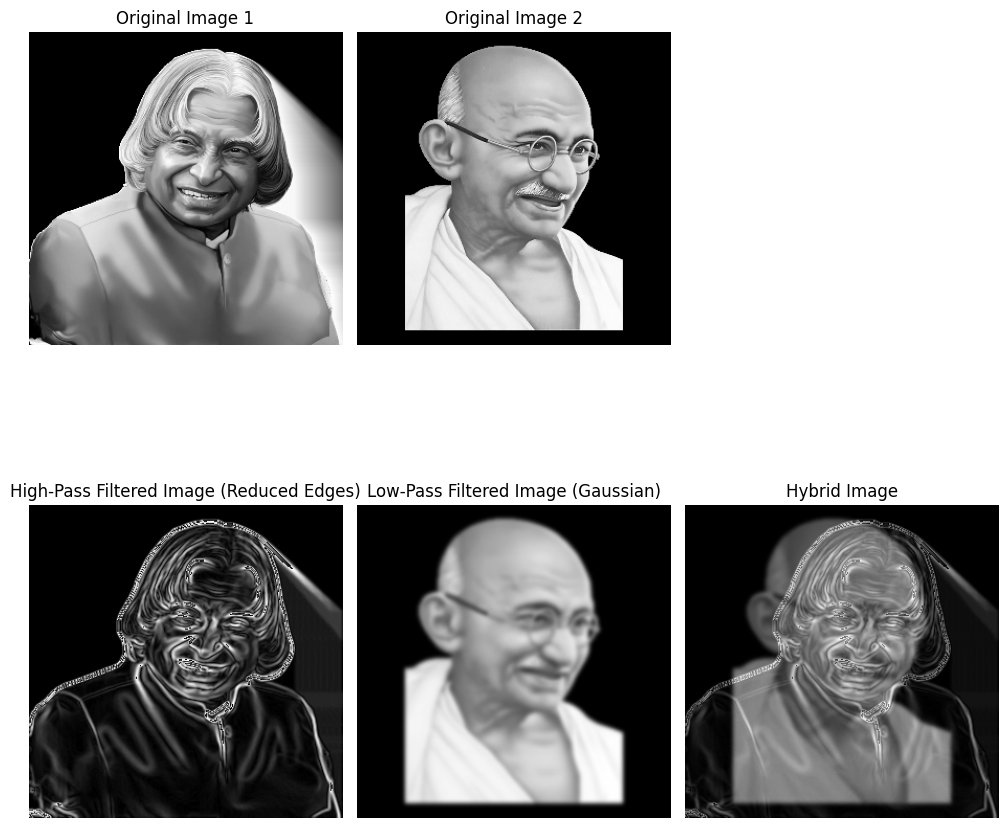

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def show(image, n, m, i, Title):
    plt.subplot(n, m, i)
    plt.imshow(image, cmap='gray')
    plt.title(Title)
    plt.axis('off')

# Load two images and resize them to the same dimensions
image1 = cv2.imread('img1ass1.png', cv2.IMREAD_GRAYSCALE)  # Replace with first image path
image2 = cv2.imread('img2ass1.png', cv2.IMREAD_GRAYSCALE)  # Replace with second image path

# Resize both images
image1 = cv2.resize(image1, (300, 300))
image2 = cv2.resize(image2, (300, 300))

# Step 1: Pre-smooth Image1 to Reduce Noise
image1_blurred = cv2.GaussianBlur(image1, (5, 5), 0)

# Step 2: Apply High-Pass Filtering Using Sobel on Smoothed Image
sobel_x = cv2.Sobel(image1_blurred, cv2.CV_64F, 1, 0, ksize=3)  # X-gradient
sobel_y = cv2.Sobel(image1_blurred, cv2.CV_64F, 0, 1, ksize=3)  # Y-gradient

# Combine gradients to get edge magnitude
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
high_pass = np.uint8(np.absolute(sobel_combined))  # Convert to uint8 for display

# Step 3: Apply Low-Pass Filtering (Gaussian Blur) on Image2
low_pass = cv2.GaussianBlur(image2, (11, 11), 0)

# Step 4: Combine High-Pass and Low-Pass Filtered Images
hybrid_image = cv2.addWeighted(high_pass, 0.5, low_pass, 0.5, 0)

# Plot the results
plt.figure(figsize=(10, 10))

show(image1, 2, 3, 1, 'Original Image 1')
show(image2, 2, 3, 2, 'Original Image 2')
show(high_pass, 2, 3, 4, 'High-Pass Filtered Image (Reduced Edges)')
show(low_pass, 2, 3, 5, 'Low-Pass Filtered Image (Gaussian)')
show(hybrid_image, 2, 3, 6, 'Hybrid Image')

plt.tight_layout()
plt.show()
